In [230]:
import pandas as pd
df= pd.read_csv("Metabolic Syndrome.csv")
df

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1


In [232]:
duplicates=df.duplicated()
sum(duplicates)


0

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [236]:
# Convert 'Albuminuria' column to object type
df['Albuminuria'] =df['Albuminuria'].astype('object')

# Optional: Check the result
print(df.dtypes['Albuminuria'])


object


In [238]:
#check for missing values in each column

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Marital      208
Income       117
WaistCirc     85
BMI           26
dtype: int64


In [240]:
df.describe()


,seqn,Age,Income,WaistCirc,BMI,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,62161.000000,20.000000,300.000000,56.200000,13.400000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


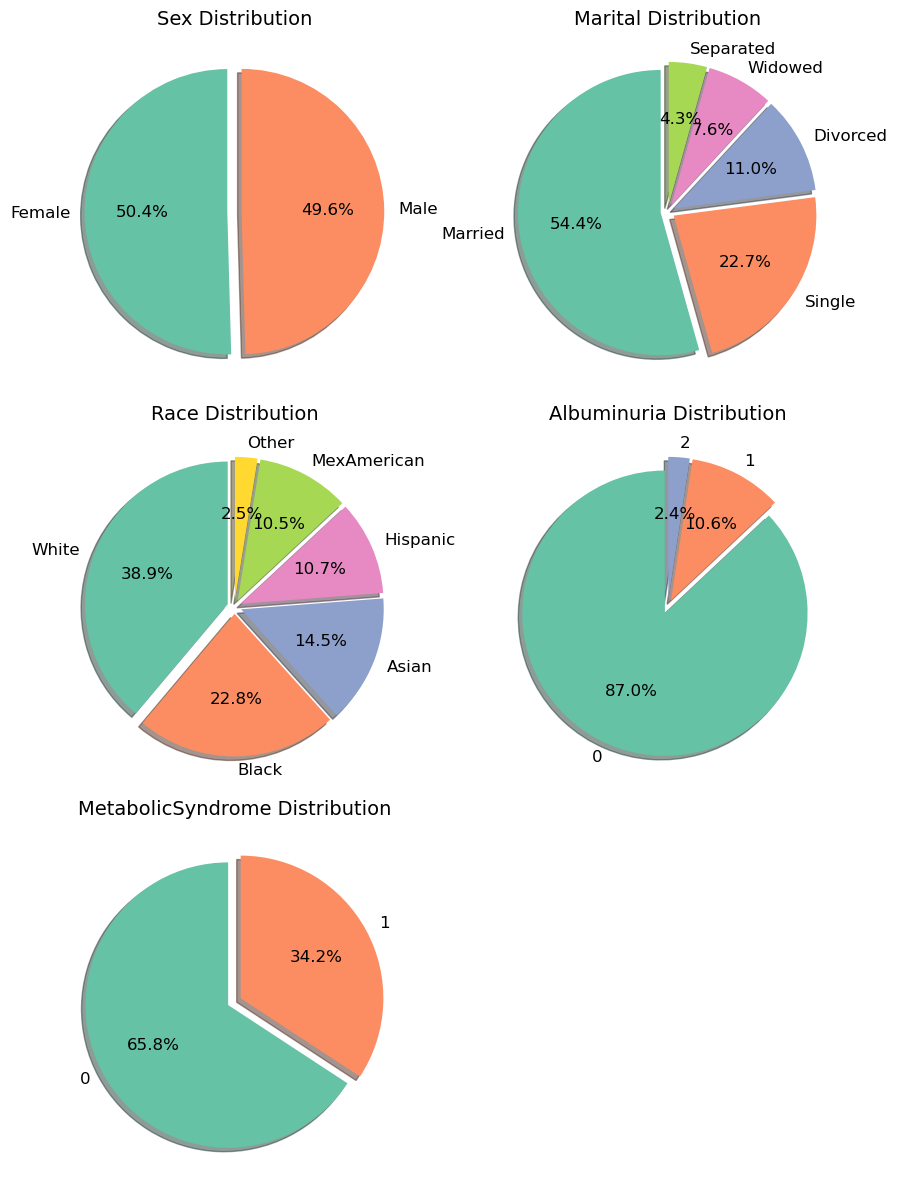

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

columns_to_look = ["Sex", "Marital", "Race", "Albuminuria", "MetabolicSyndrome"]

# Grid setup: 2 plots per row
n_cols = 2
n_rows = math.ceil(len(columns_to_look) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_look):
    non_null_values = df[col].dropna()
    value_counts = non_null_values.value_counts()
    labels = value_counts.index.tolist()
    pie_colors = sns.color_palette('Set2', len(labels))

    axes[i].pie(
        value_counts,
        labels=labels,
        shadow=True,
        explode=[0.05] * len(labels),
        autopct='%1.1f%%',
        textprops={'size': 12},
        colors=pie_colors,
        startangle=90
    )
    axes[i].set_title(f'{col} Distribution', fontsize=14)

# Hide unused axes if the number of columns is odd
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


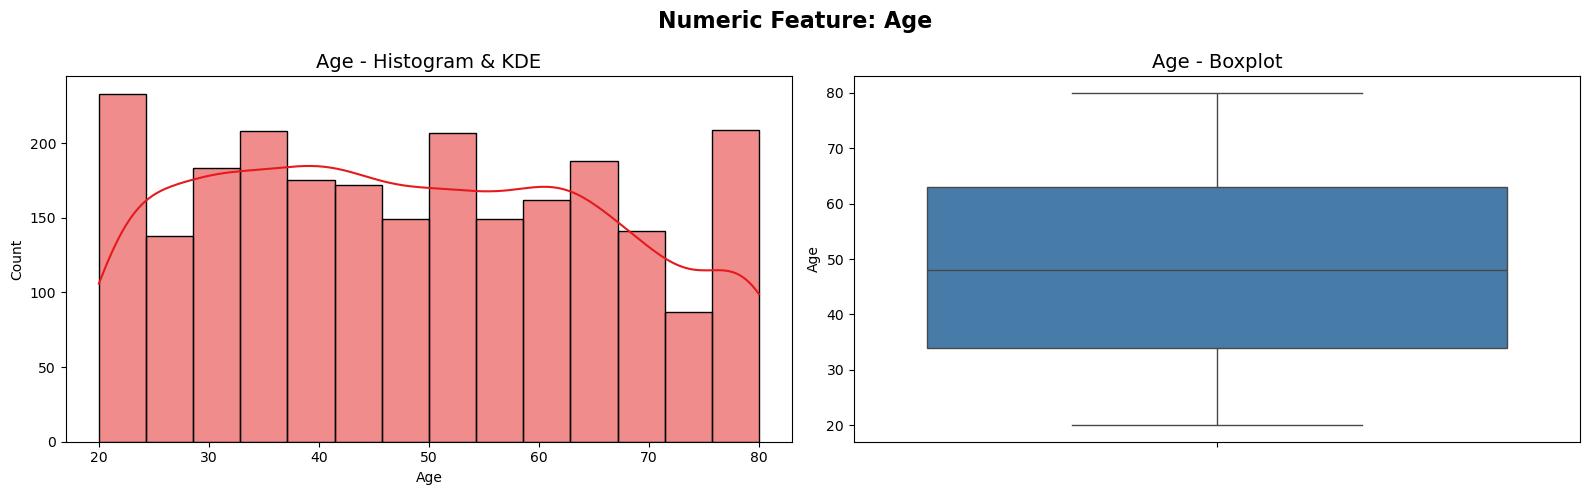

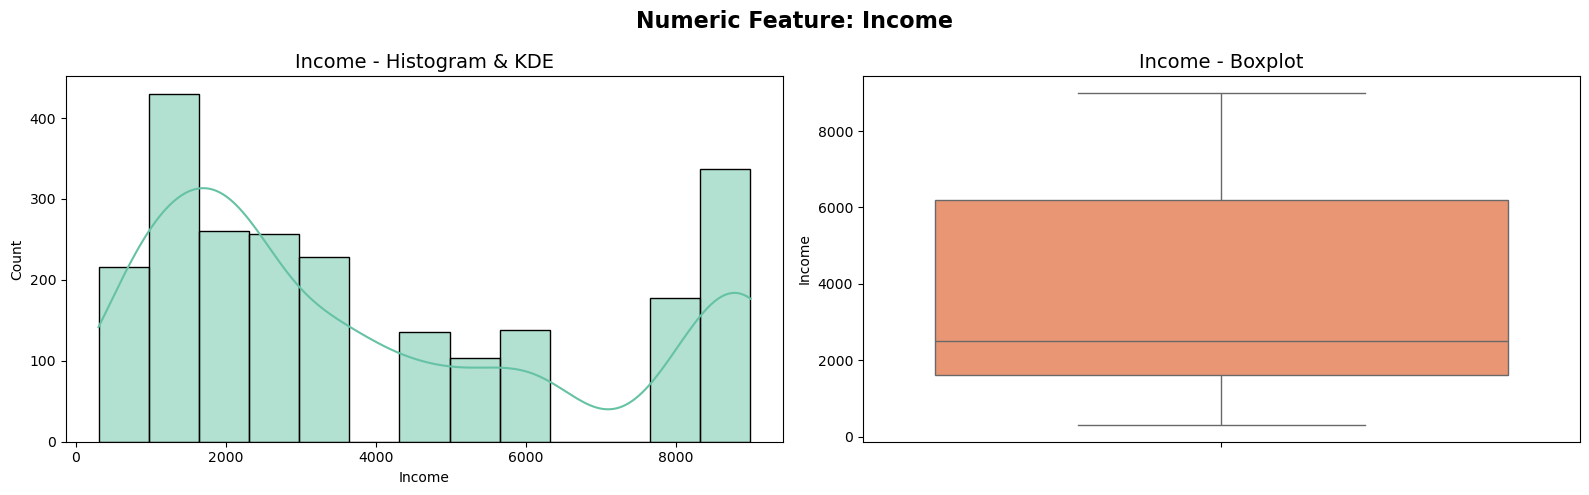

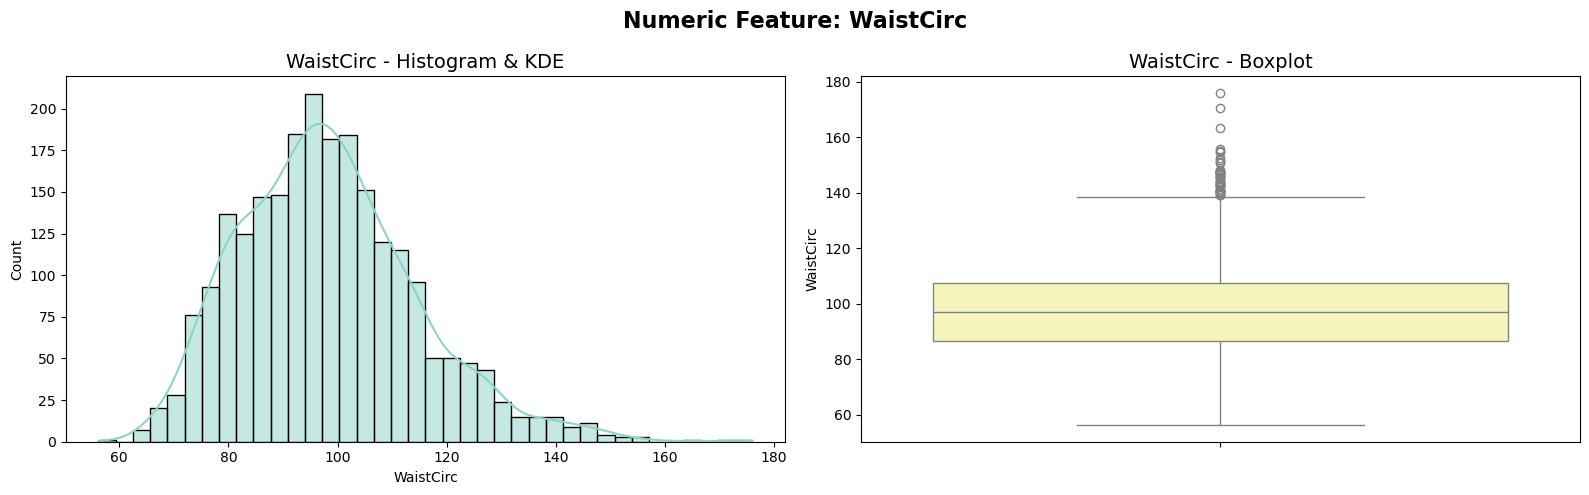

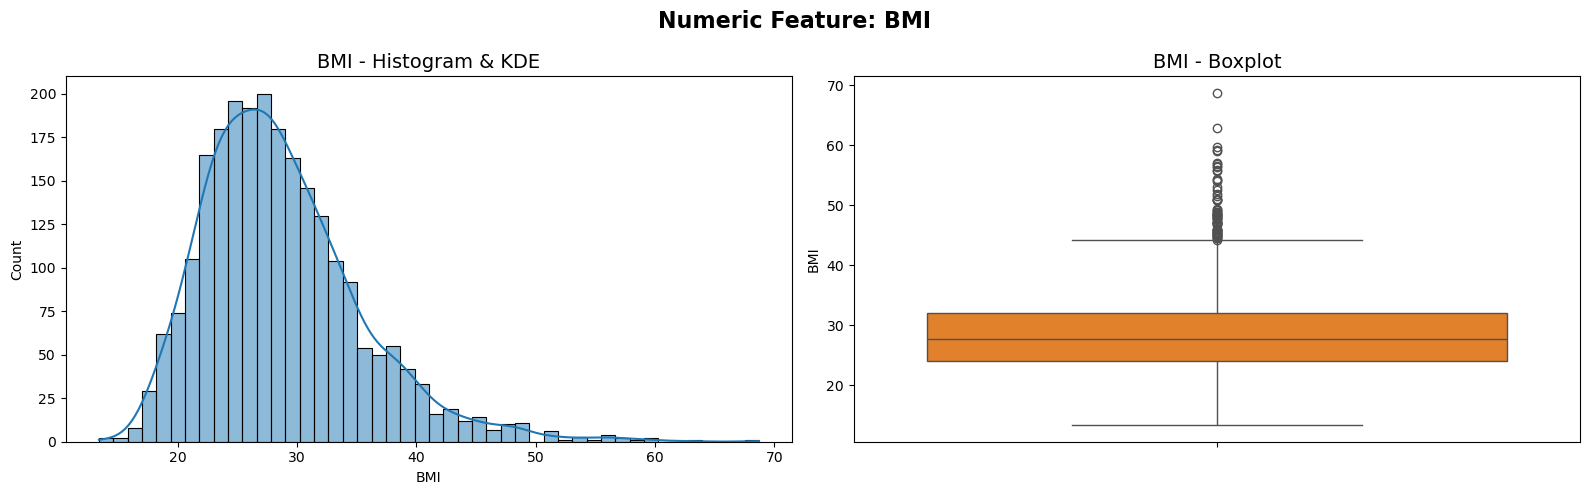

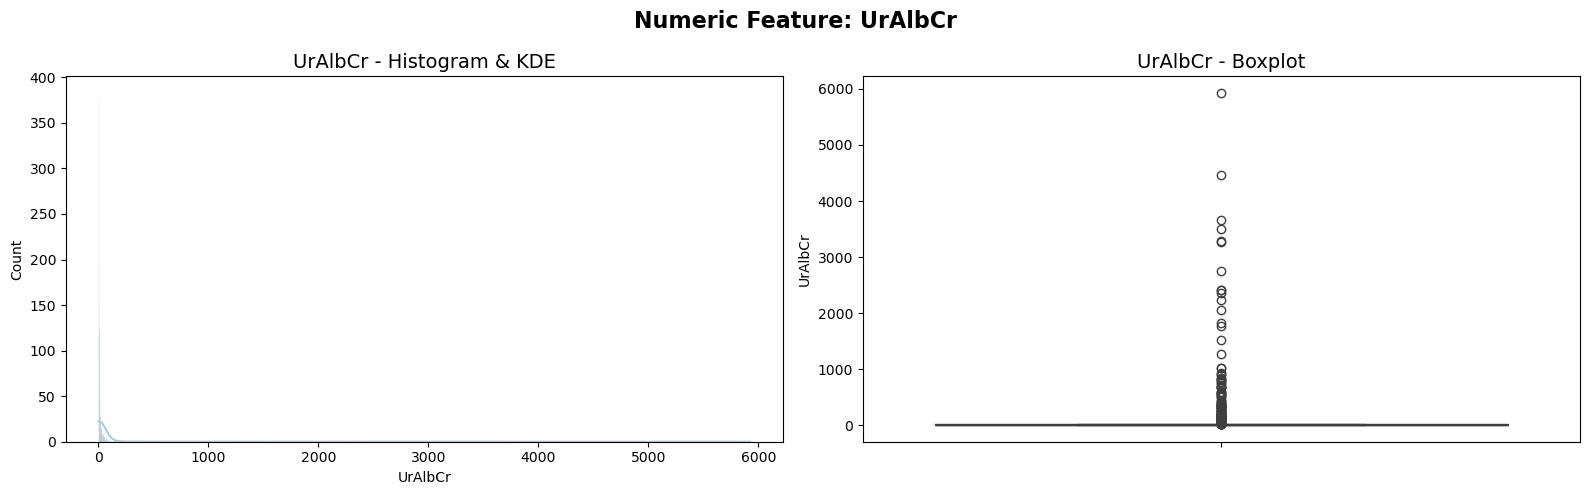

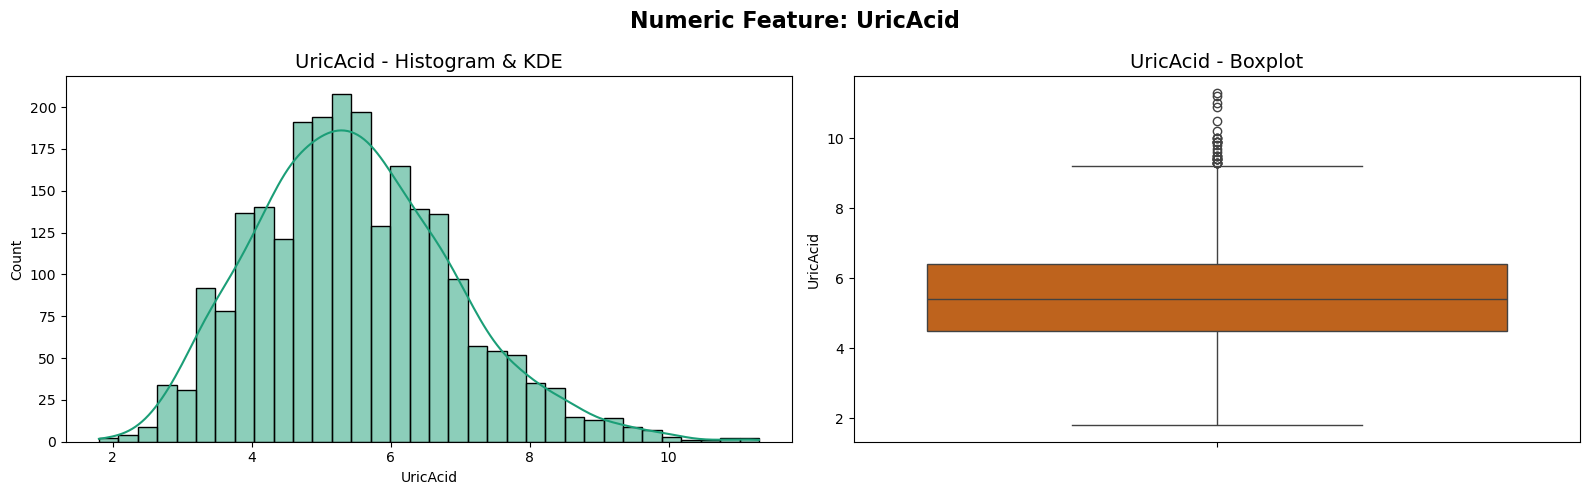

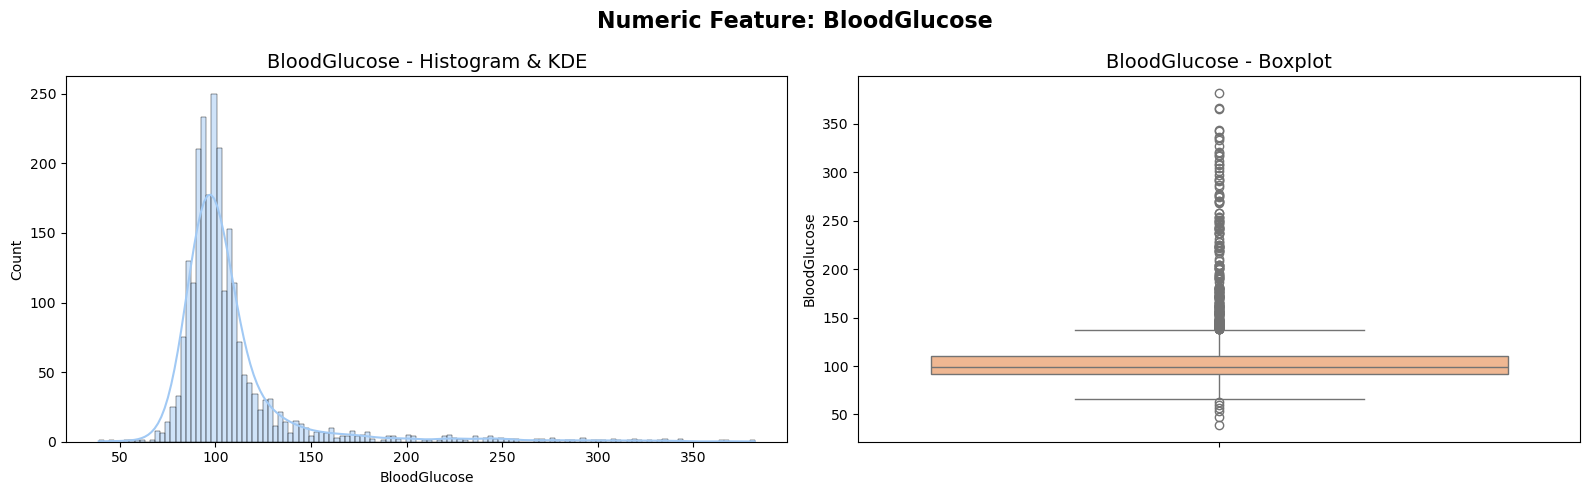

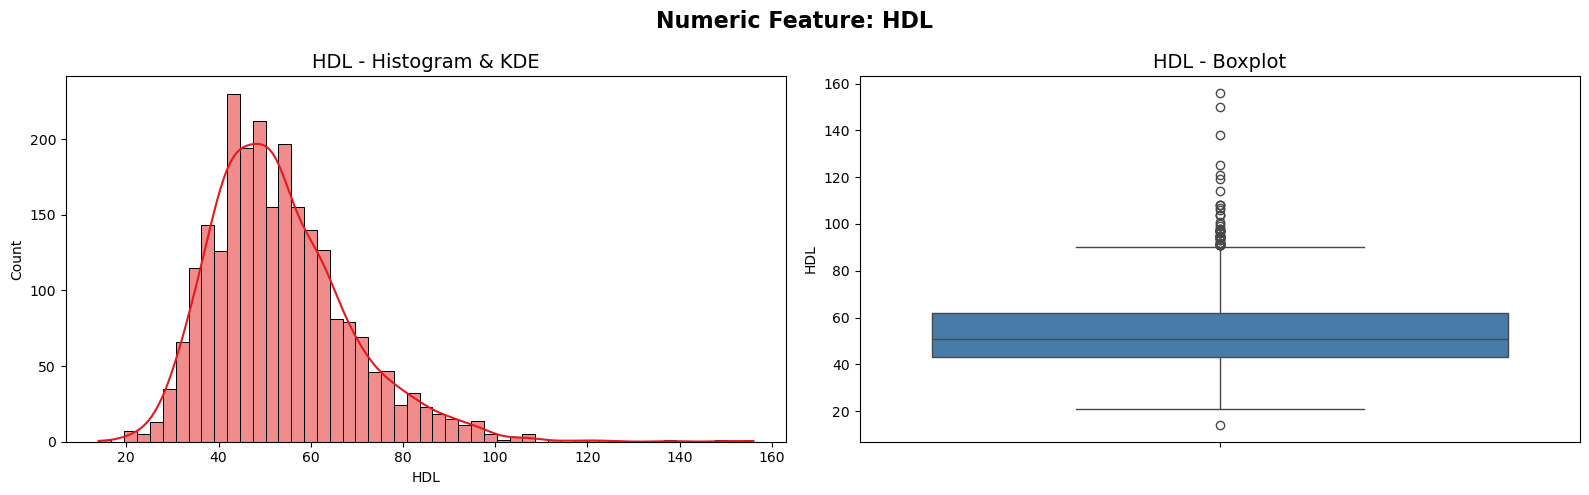

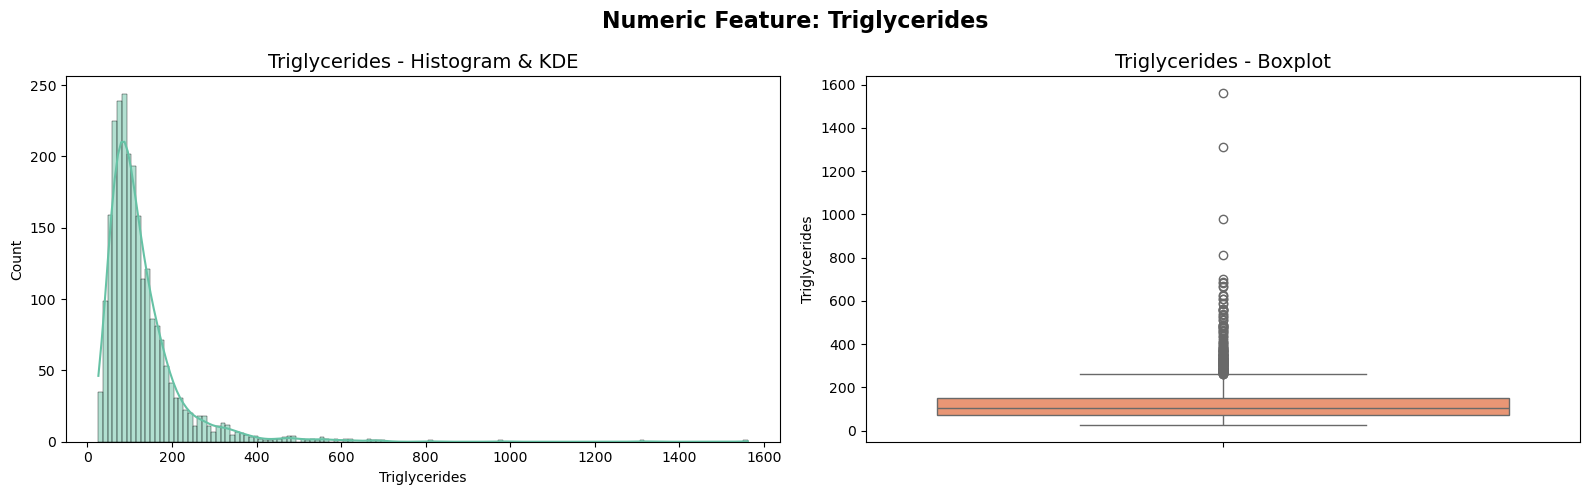

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_numeric_kde_boxplot(train_df, numeric_cols):
    # Define a list of Seaborn color palettes
    palette_list = ['Set1', 'Set2', 'Set3', 'tab10', 'Paired', 'Dark2', 'pastel']

    for i, col in enumerate(numeric_cols):
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        
        # Pick a palette based on index (cyclic)
        palette = sns.color_palette(palette_list[i % len(palette_list)])
        color_hist = palette[0]
        color_box = palette[1] if len(palette) > 1 else palette[0]

        # KDE + Histogram
        sns.histplot(train_df, x=col, kde=True, color=color_hist, ax=axes[0])
        axes[0].set_title(f'{col} - Histogram & KDE', fontsize=14)

        # Boxplot
        sns.boxplot(train_df, y=col, color=color_box, ax=axes[1])
        axes[1].set_title(f'{col} - Boxplot', fontsize=14)

        # Overall title
        fig.suptitle(f'Numeric Feature: {col}', fontsize=16, fontweight='bold')
        fig.subplots_adjust(wspace=0.3)
        plt.tight_layout()
        plt.show()


numeric_cols = df.drop(columns=["seqn", "Albuminuria","MetabolicSyndrome"]).select_dtypes(include="number").columns
plot_numeric_kde_boxplot(df, numeric_cols)


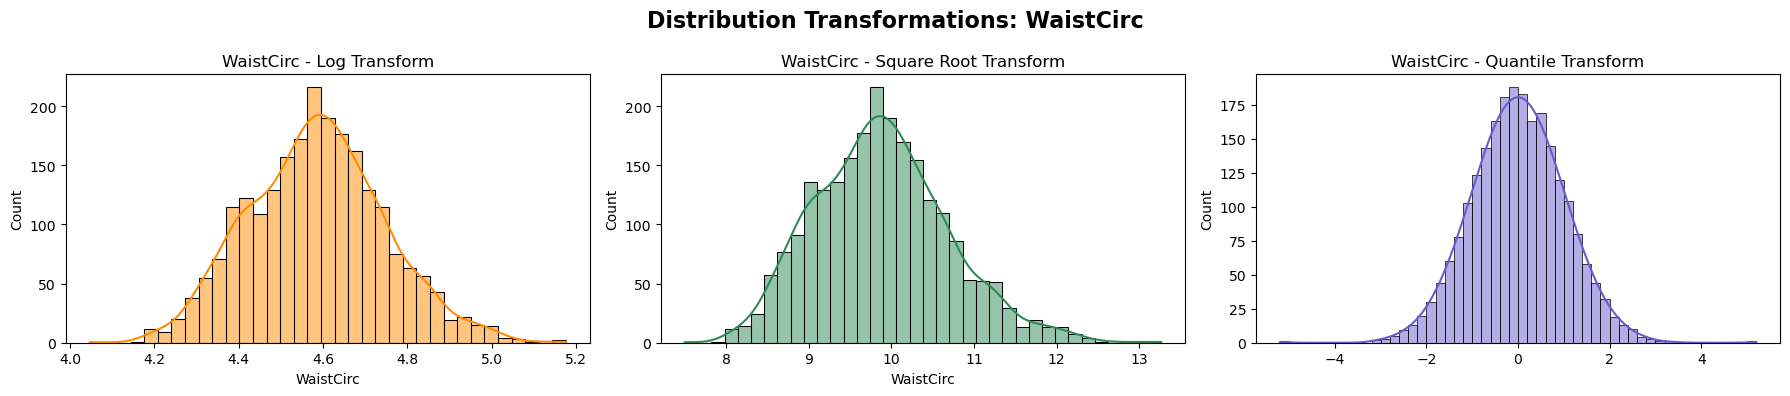

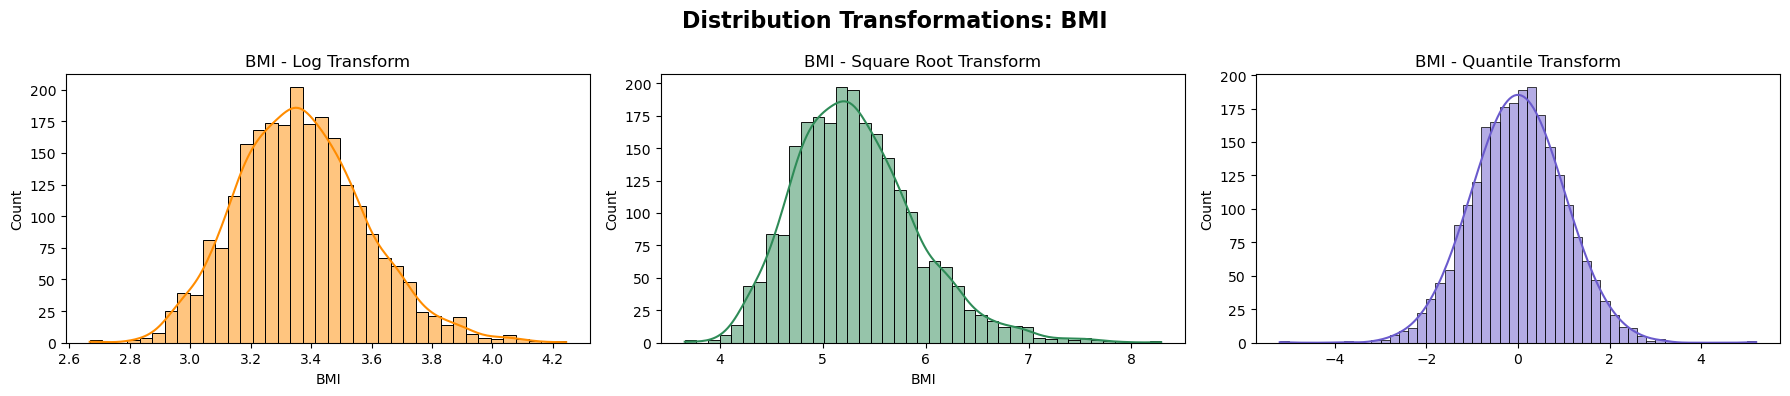

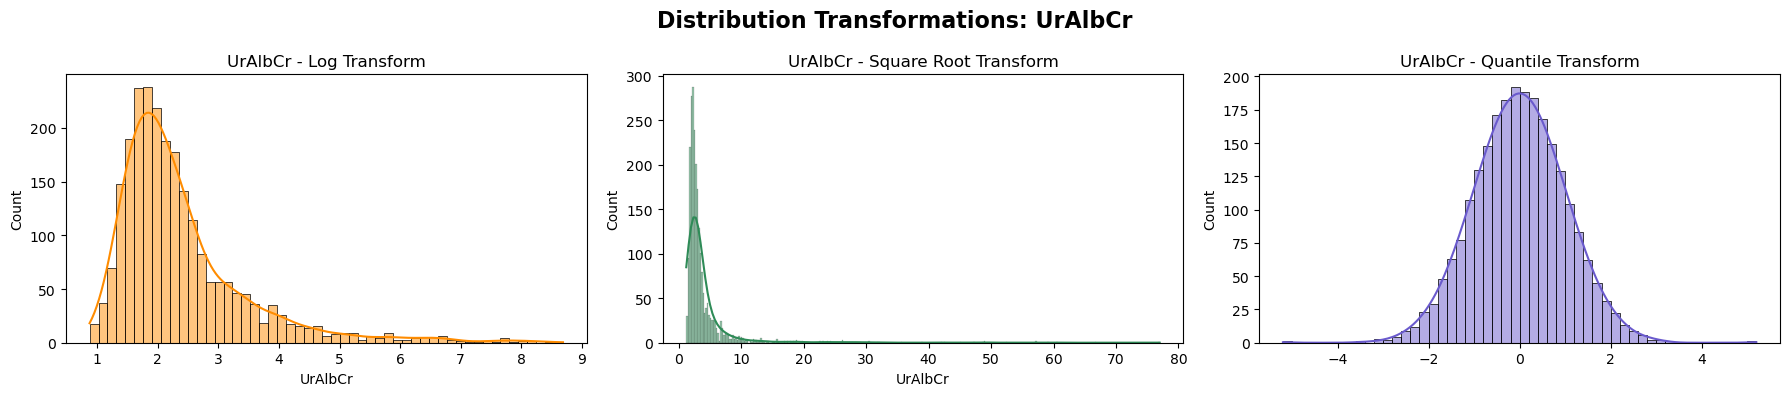

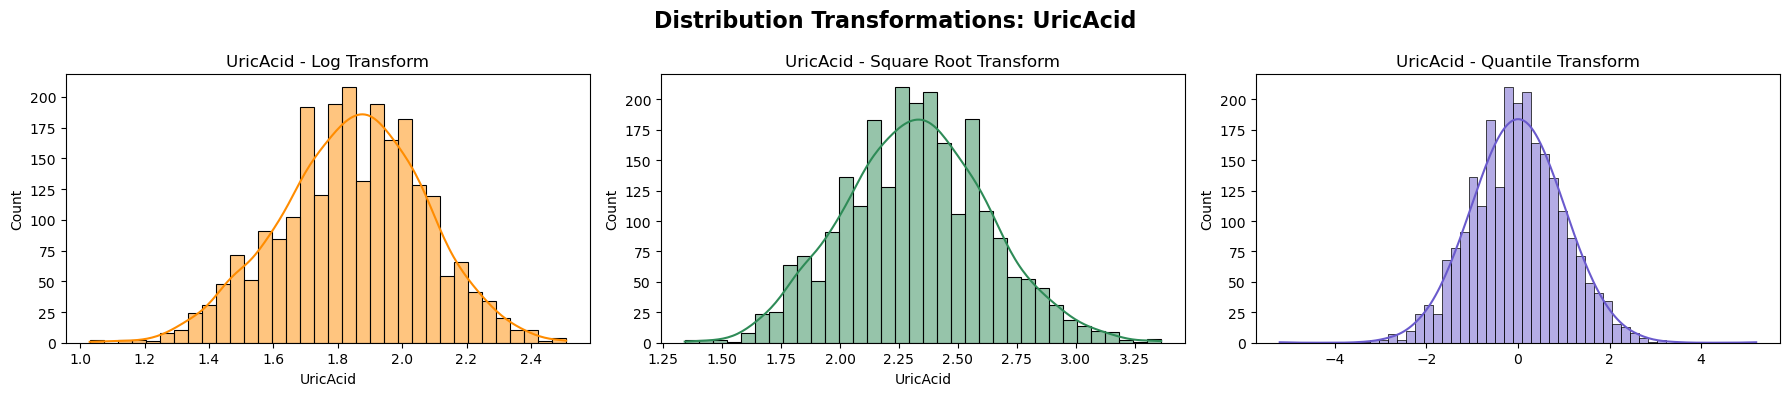

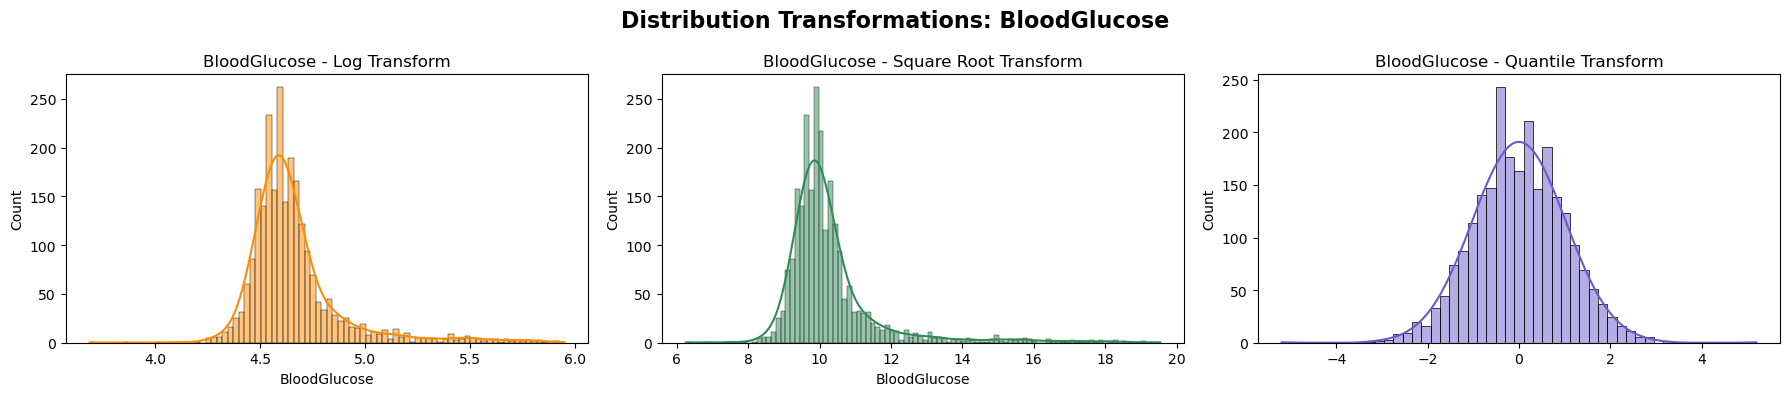

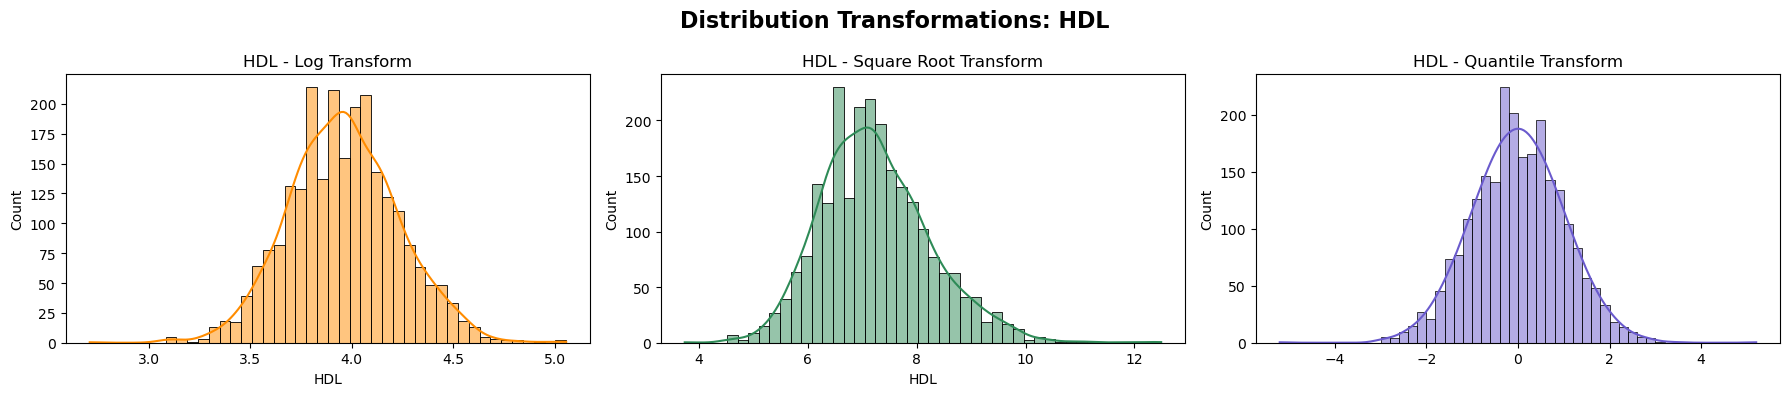

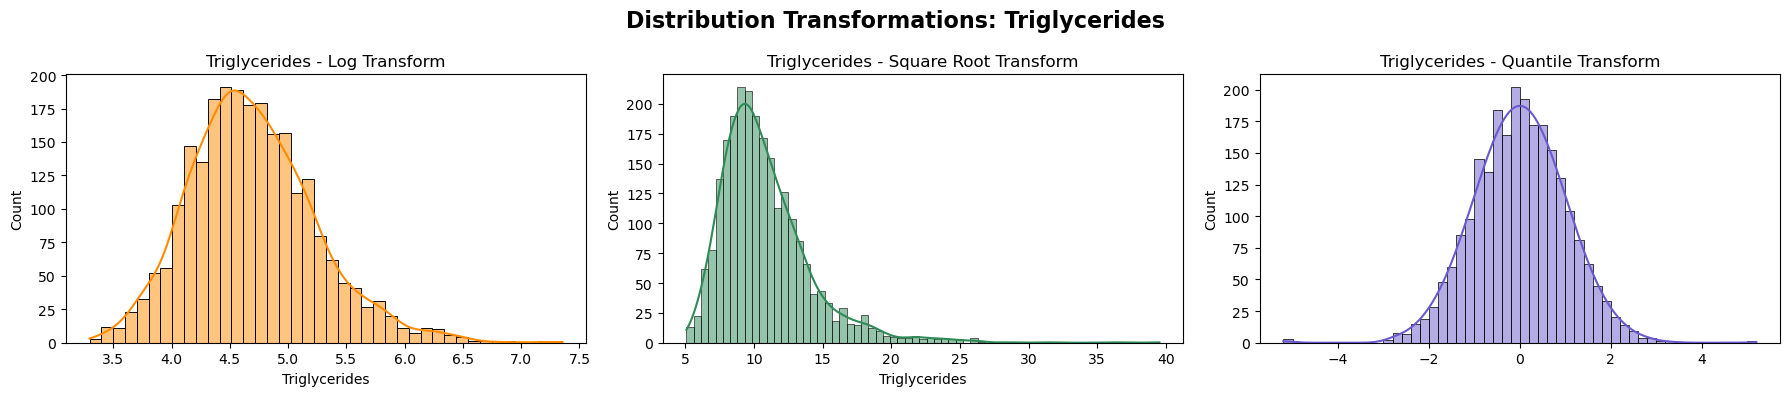

In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer

# Variables to transform
variables = ["WaistCirc", "BMI", "UrAlbCr", "UricAcid", "BloodGlucose", "HDL", "Triglycerides"]

# Initialize QuantileTransformer (maps data to uniform or normal)
quantile_tf = QuantileTransformer(output_distribution='normal', random_state=42)

# Loop over each variable
for var in variables:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    
    # Drop NA
    data = df[var].dropna()
    
    # Transformation
    log_trans = np.log1p(data)  # log1p handles zero values
    sqrt_trans = np.sqrt(data)
    quantile_trans = pd.Series(quantile_tf.fit_transform(data.values.reshape(-1, 1)).flatten(), index=data.index)

    # Plot original vs. transformed
    sns.histplot(log_trans, ax=axes[0], kde=True, color='darkorange')
    axes[0].set_title(f'{var} - Log Transform')

    sns.histplot(sqrt_trans, ax=axes[1], kde=True, color='seagreen')
    axes[1].set_title(f'{var} - Square Root Transform')

    sns.histplot(quantile_trans, ax=axes[2], kde=True, color='slateblue')
    axes[2].set_title(f'{var} - Quantile Transform')

    fig.suptitle(f'Distribution Transformations: {var}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_10644\324369205.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Transformed Value', data=quantile_melted, palette='Set2')


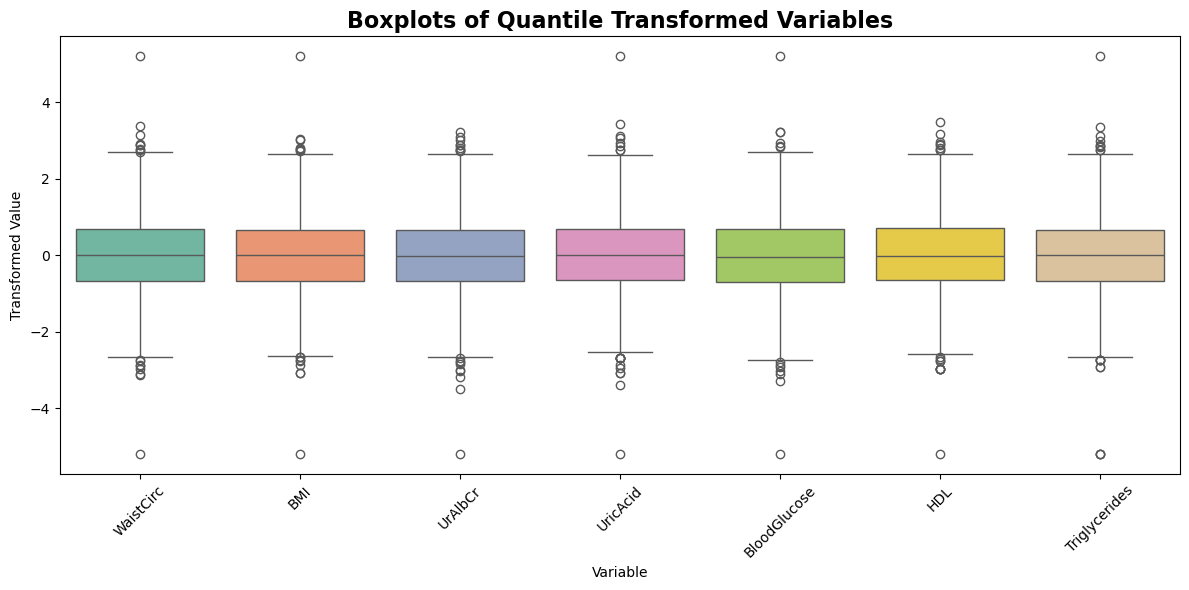

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

# List of numerical variables to transform
variables = ["WaistCirc", "BMI", "UrAlbCr", "UricAcid", "BloodGlucose", "HDL", "Triglycerides"]

# Initialize quantile transformer
quantile_tf = QuantileTransformer(output_distribution='normal', random_state=42)

# Create a copy to hold transformed data
quantile_df = pd.DataFrame()

# Apply transformation
for var in variables:
    data = df[var].dropna()
    transformed = quantile_tf.fit_transform(data.values.reshape(-1, 1)).flatten()
    quantile_df[var] = pd.Series(transformed, index=data.index)

# Melt the DataFrame for seaborn boxplot
quantile_melted = quantile_df.melt(var_name='Variable', value_name='Transformed Value')

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Variable', y='Transformed Value', data=quantile_melted, palette='Set2')
plt.title('Boxplots of Quantile Transformed Variables', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [250]:
# Select the non-transformed variables to keep (e.g., categorical or other variables)
# You can modify this list based on your needs
other_vars = [col for col in df.columns if col not in variables]

# Create a DataFrame with those variables, ensuring indices align with quantile_df
other_df = df.loc[quantile_df.index, other_vars]

# Concatenate quantile-transformed data with the rest of the variables
quantile_df = pd.concat([quantile_df, other_df], axis=1)

# Optional: display the final combined DataFrame
print(quantile_df.head())


   WaistCirc       BMI   UrAlbCr  UricAcid  BloodGlucose       HDL  \
0  -1.046576 -0.826698 -0.929548 -0.352151     -0.692715 -0.837338   
1  -1.149742 -0.858910  0.216204 -0.650274     -1.733071 -2.256745   
2  -2.206405 -1.611333 -0.472407  0.006273      0.513491 -0.647177   
3   1.305981  0.824933 -0.425228 -0.282216      0.334851  1.269664   
4  -1.033647 -1.611333  0.166169 -0.282216     -0.408805 -0.647177   

   Triglycerides   seqn  Age     Sex  Marital  Income   Race Albuminuria  \
0      -0.430727  62161   22    Male   Single  8200.0  White           0   
1      -1.289578  62164   44  Female  Married  4500.0  White           0   
2      -0.567211  62169   21    Male   Single   800.0  Asian           0   
3       0.559859  62172   43  Female   Single  2000.0  Black           0   
4       0.370902  62177   51    Male  Married     NaN  Asian           0   

   MetabolicSyndrome  
0                  0  
1                  0  
2                  0  
3                  0  
4      

In [252]:
quantile_df.shape

(2316, 15)

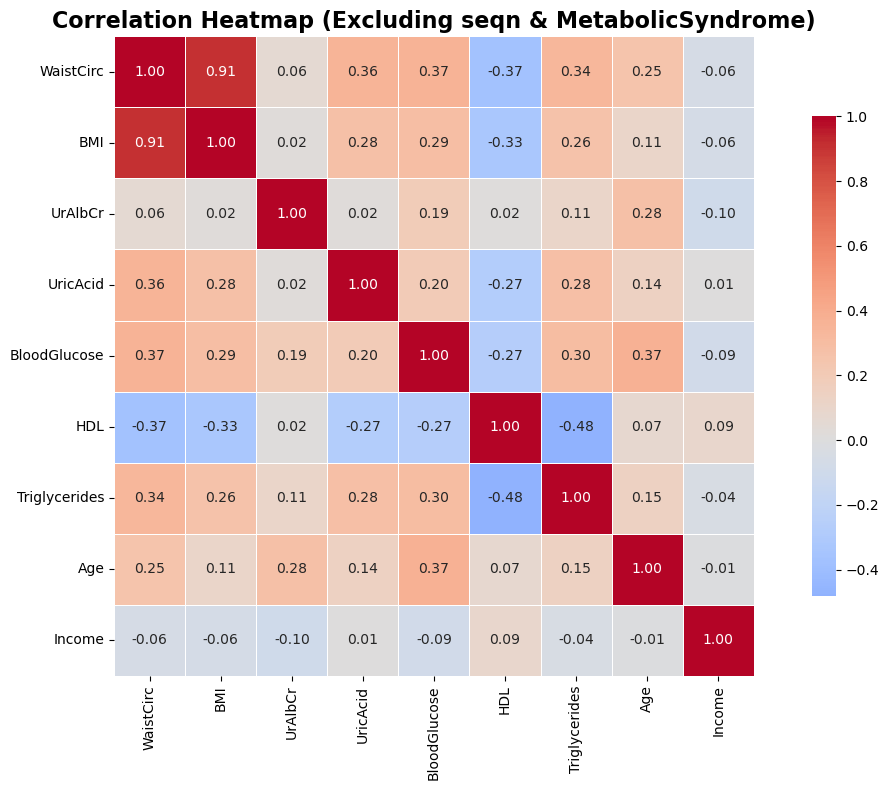

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns and drop specified ones
numeric_df = quantile_df.select_dtypes(include='number').drop(columns=['seqn', 'MetabolicSyndrome'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

plt.title('Correlation Heatmap (Excluding seqn & MetabolicSyndrome)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [256]:
from sklearn.model_selection import train_test_split

# If you have a target variable, add it here:
# quantile_df['target'] = df['YourTargetColumn']

# Split into train and test (80% train, 20% test)
train_df, test_df = train_test_split(
    quantile_df, 
    test_size=0.2, 
    random_state=42
)

# Check shape for confirmation
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (1852, 15)
Test shape: (464, 15)


In [258]:
#set the multiplier for IQR
iqr_multiplier= 1.5

#Dictionary to store outlier counts
outlier_summary = {}

# Loop only through numeric columns
for col in train_df.select_dtypes(include='number').columns:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    # Detect outliers
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]

    # Store results
    outlier_summary[col] = {
        'Total Observations': train_df[col].shape[0],
        'Outlier Count': outliers.shape[0],
        'Outlier %': round(100 * outliers.shape[0] / train_df[col].shape[0], 2)
    }

outlier_df_train= pd.DataFrame(outlier_summary).T
outlier_df_train.reset_index(inplace=True)
outlier_df_train.rename(columns={'index':'variable'},inplace=True)
print(outlier_df_train)


             variable  Total Observations  Outlier Count  Outlier %
0           WaistCirc              1852.0           15.0       0.81
1                 BMI              1852.0           13.0       0.70
2             UrAlbCr              1852.0           15.0       0.81
3            UricAcid              1852.0           18.0       0.97
4        BloodGlucose              1852.0           19.0       1.03
5                 HDL              1852.0           23.0       1.24
6       Triglycerides              1852.0           11.0       0.59
7                seqn              1852.0            0.0       0.00
8                 Age              1852.0            0.0       0.00
9              Income              1852.0            0.0       0.00
10  MetabolicSyndrome              1852.0            0.0       0.00


In [260]:
# Set the multiplier for IQR
iqr_multiplier = 1.5

# Start with all True mask (keep all rows)
non_outlier_mask = pd.Series(True, index=train_df.index)

# Loop only through numeric columns
for col in train_df.select_dtypes(include='number').columns:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    # Update mask to keep only rows within bounds
    non_outlier_mask &= train_df[col].between(lower_bound, upper_bound)

# Apply the mask to filter the training set
train_df_no_outliers = train_df[non_outlier_mask].copy()

# Show results
print(f"Original training rows: {train_df.shape[0]}")
print(f"Rows after outlier removal: {train_df_no_outliers.shape[0]}")


Original training rows: 1852
Rows after outlier removal: 1660


In [262]:
train_df= train_df_no_outliers.copy()

In [264]:
train_df.shape

(1660, 15)

C:\Users\acer\AppData\Local\Temp\ipykernel_10644\12858429.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=metabolic_yes, x='Race', ax=axes[0], palette='Set1')
C:\Users\acer\AppData\Local\Temp\ipykernel_10644\12858429.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=metabolic_no, x='Race', ax=axes[1], palette='Set2')


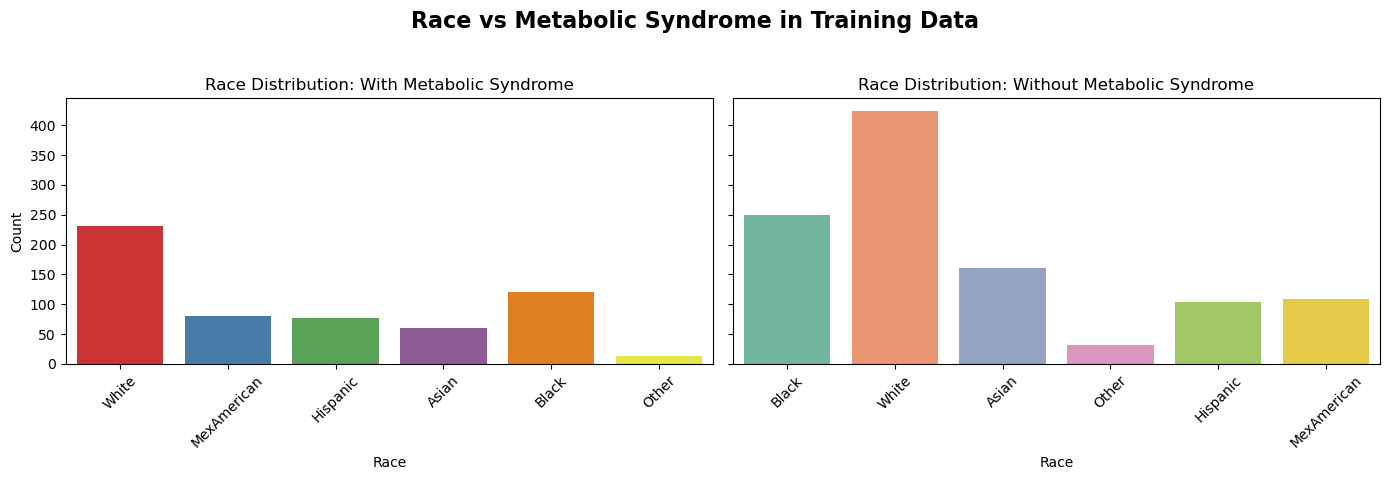

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, attach Race and MetabolicSyndrome from original df
train_df['Race'] = df.loc[train_df.index, 'Race']
train_df['MetabolicSyndrome'] = df.loc[train_df.index, 'MetabolicSyndrome']

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Subset for with and without Metabolic Syndrome
metabolic_yes = train_df[train_df['MetabolicSyndrome'] == 1]
metabolic_no = train_df[train_df['MetabolicSyndrome'] == 0]

# Plot with Metabolic Syndrome
sns.countplot(data=metabolic_yes, x='Race', ax=axes[0], palette='Set1')
axes[0].set_title('Race Distribution: With Metabolic Syndrome')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot without Metabolic Syndrome
sns.countplot(data=metabolic_no, x='Race', ax=axes[1], palette='Set2')
axes[1].set_title('Race Distribution: Without Metabolic Syndrome')
axes[1].set_xlabel('Race')
axes[1].tick_params(axis='x', rotation=45)

# Layout
fig.suptitle('Race vs Metabolic Syndrome in Training Data', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


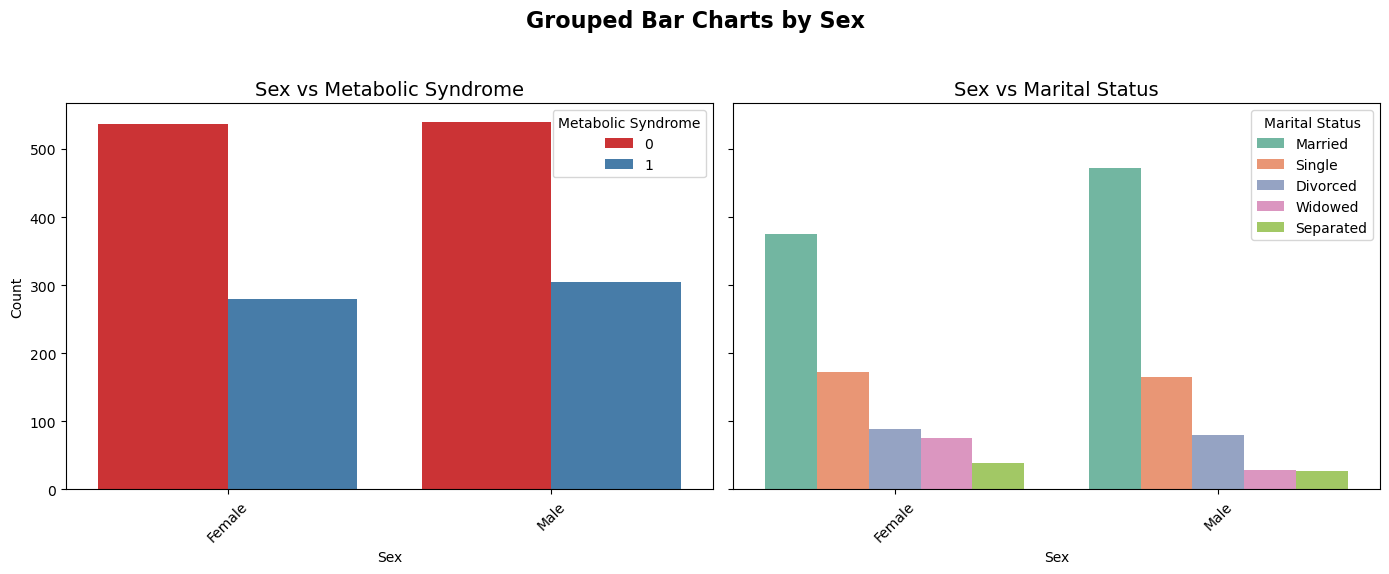

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, reattach required columns to train_df if missing
train_df['Sex'] = df.loc[train_df.index, 'Sex']
train_df['MetabolicSyndrome'] = df.loc[train_df.index, 'MetabolicSyndrome']
train_df['Marital'] = df.loc[train_df.index, 'Marital']

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot 1: Sex vs Metabolic Syndrome
sns.countplot(data=train_df, x='Sex', hue='MetabolicSyndrome', palette='Set1', ax=axes[0])
axes[0].set_title('Sex vs Metabolic Syndrome', fontsize=14)
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')
axes[0].legend(title='Metabolic Syndrome')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Sex vs Marital Status
sns.countplot(data=train_df, x='Sex', hue='Marital', palette='Set2', ax=axes[1])
axes[1].set_title('Sex vs Marital Status', fontsize=14)
axes[1].set_xlabel('Sex')
axes[1].legend(title='Marital Status')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
fig.suptitle('Grouped Bar Charts by Sex', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [270]:
# Attach target column to train and test from original df
train_df['MetabolicSyndrome'] = df.loc[train_df.index, 'MetabolicSyndrome']
test_df['MetabolicSyndrome'] = df.loc[test_df.index, 'MetabolicSyndrome']

# Split features and target
X_train = train_df.drop(columns=['MetabolicSyndrome'])
y_train = train_df['MetabolicSyndrome']

X_test = test_df.drop(columns=['MetabolicSyndrome'])
y_test = test_df['MetabolicSyndrome']




In [272]:
cat_cols=X_train.select_dtypes("object").columns
num_cols=X_train.select_dtypes("number").columns

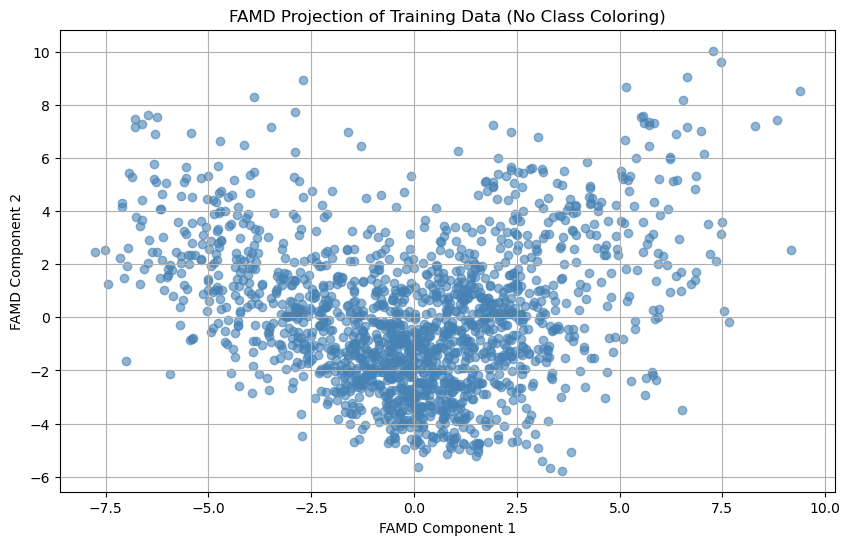

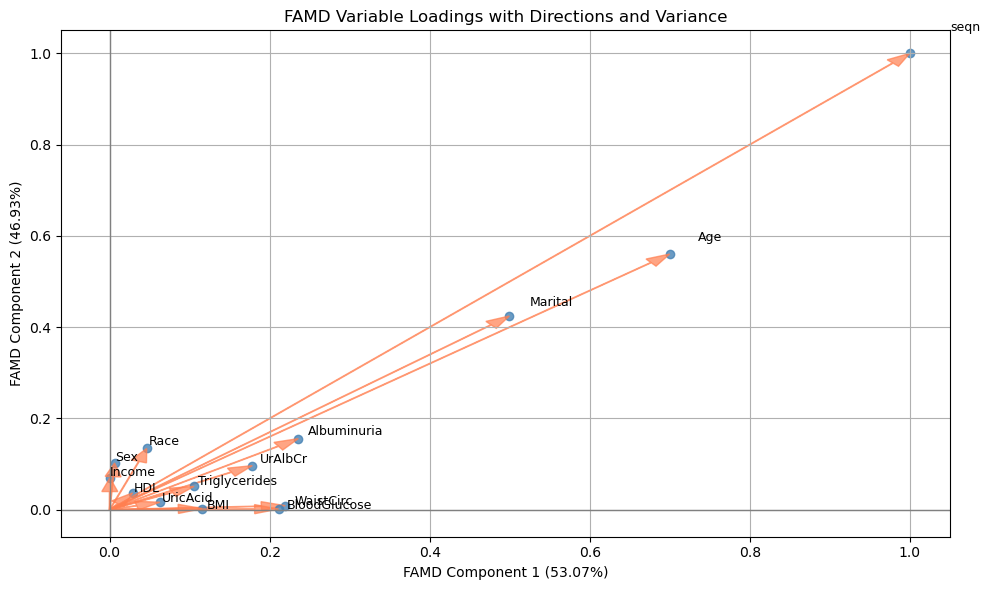

In [274]:
# Make sure to install prince: pip install prince

import prince
import matplotlib.pyplot as plt

# Step 1: Prepare data for FAMD
famd_data = X_train.copy()
famd_data[cat_cols] = famd_data[cat_cols].astype('category')  # Ensure categorical types

# Add the target for coloring
famd_data['MetabolicSyndrome'] = y_train.values

# Step 2: Initialize and run FAMD
famd = prince.FAMD(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit the model
famd = famd.fit(famd_data.drop(columns=['MetabolicSyndrome']))

# Get row coordinates (projections of observations)
row_coords = famd.row_coordinates(famd_data.drop(columns=['MetabolicSyndrome']))
row_coords['MetabolicSyndrome'] = y_train.values

# Plot FAMD projection 
plt.figure(figsize=(10, 6))
plt.scatter(row_coords[0], row_coords[1], alpha=0.6, color='steelblue')
plt.xlabel('FAMD Component 1')
plt.ylabel('FAMD Component 2')
plt.title('FAMD Projection of Training Data (No Class Coloring)')
plt.grid(True)
plt.show()


# Get variable coordinates after fitting
loadings = famd.column_coordinates_

# Plot variable loadings
plt.figure(figsize=(10, 6))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

for i in range(loadings.shape[0]):
    x, y = loadings.iloc[i, 0], loadings.iloc[i, 1]
    plt.scatter(x, y, color='steelblue', alpha=0.8)
    plt.arrow(0, 0, x, y, color='coral', alpha=0.7, head_width=0.02, length_includes_head=True)
    plt.text(x * 1.05, y * 1.05, loadings.index[i], fontsize=9)

# Variance explained from row_coords
explained_var = row_coords[[0, 1]].var() / row_coords[[0, 1]].var().sum()
var1 = explained_var[0] * 100
var2 = explained_var[1] * 100

plt.xlabel(f'FAMD Component 1 ({var1:.2f}%)')
plt.ylabel(f'FAMD Component 2 ({var2:.2f}%)')
plt.title('FAMD Variable Loadings with Directions and Variance')
plt.grid(True)
plt.tight_layout()
plt.show()




In [278]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Identify column types
cat_cols = X_train.select_dtypes("object").columns
num_cols = X_train.select_dtypes("number").columns

# Pipeline for numeric features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine both pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Encode the target variable
le = LabelEncoder()
y_train_preprocessed = le.fit_transform(y_train)
y_test_preprocessed = le.transform(y_test)


In [280]:
# Re-attach original categorical columns to quantile-transformed sets
for col in ['Sex', 'Marital', 'Race']:
    X_train[col] = df.loc[X_train.index, col]
    X_test[col] = df.loc[X_test.index, col]


In [282]:
# To apply the transformation:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [284]:
import pandas as pd

# Convert arrays to DataFrames
X_train_df = pd.DataFrame(X_train_processed)
X_test_df = pd.DataFrame(X_test_processed)
y_train_df = pd.DataFrame(y_train_preprocessed, columns=['MetabolicSyndrome'])
y_test_df = pd.DataFrame(y_test_preprocessed, columns=['MetabolicSyndrome'])

# Save to CSV
X_train_df.to_csv('X_train_preprocessed.csv', index=False)
X_test_df.to_csv('X_test_preprocessed.csv', index=False)
y_train_df.to_csv('y_train_preprocessed.csv', index=False)
y_test_df.to_csv('y_test_preprocessed.csv', index=False)


For n_clusters = 2, Average Silhouette Score = 0.3543
For n_clusters = 3, Average Silhouette Score = 0.4212
For n_clusters = 4, Average Silhouette Score = 0.3309
For n_clusters = 5, Average Silhouette Score = 0.3677
For n_clusters = 6, Average Silhouette Score = 0.3412


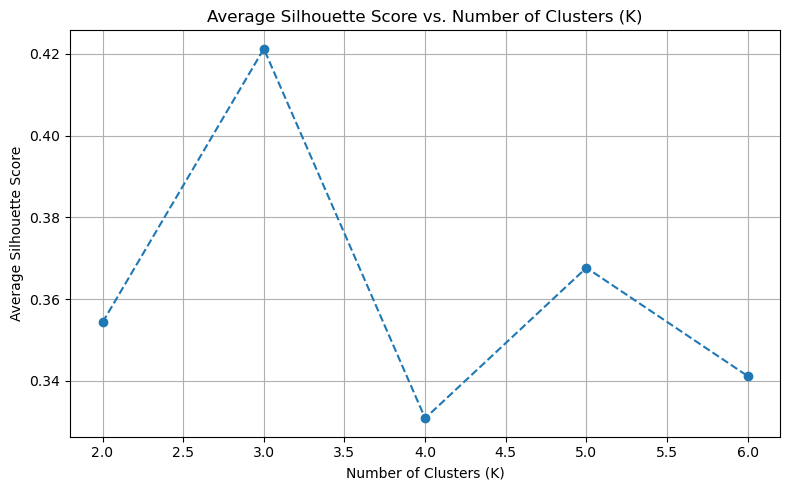

In [286]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

range_n_clusters = list(range(2, 7))
silhouette_avgs = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(famd_coords[[0, 1]])
    silhouette_avg = silhouette_score(famd_coords[[0, 1]], cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, Average Silhouette Score = {silhouette_avg:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avgs, marker='o', linestyle='--')
plt.title("Average Silhouette Score vs. Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()


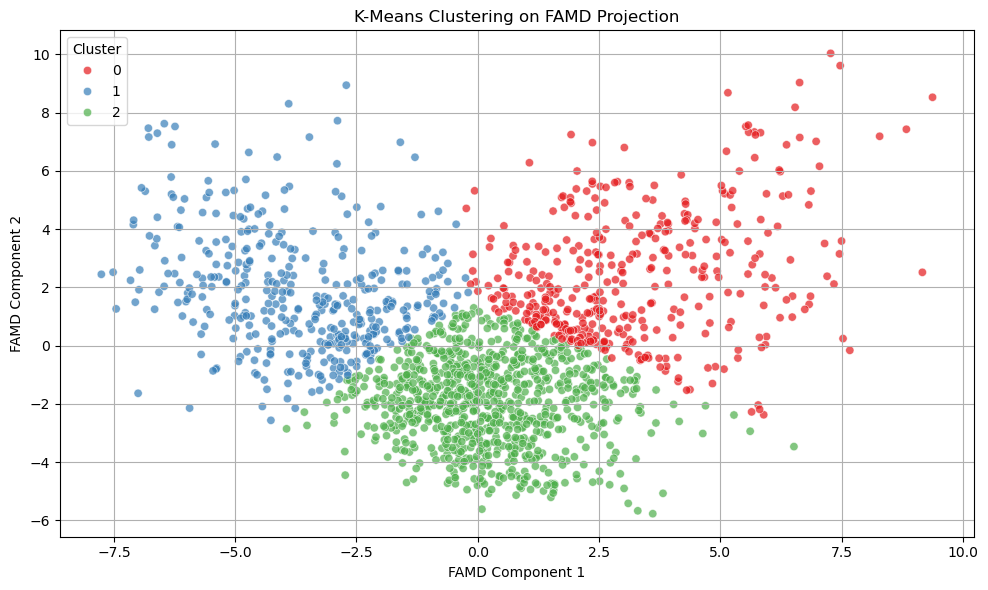

In [288]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Use first 2 FAMD components
famd_coords = famd.row_coordinates(famd_data.drop(columns=['MetabolicSyndrome']))

# Step 2: Run K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(famd_coords)

# Step 3: Plot clusters on FAMD scatter
famd_coords['Cluster'] = cluster_labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=famd_coords, x=0, y=1, hue='Cluster', palette='Set1', alpha=0.7)
plt.xlabel('FAMD Component 1')
plt.ylabel('FAMD Component 2')
plt.title('K-Means Clustering on FAMD Projection')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [290]:
row_coords_train = famd.row_coordinates(famd_data.drop(columns=['MetabolicSyndrome']))


In [292]:
# Drop rows with any NaNs before fitting FAMD
X_test_clean = X_test.dropna()

# Fit FAMD on clean test data
famd_test = prince.FAMD(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
).fit(X_test_clean)

# Get FAMD components
row_coords_test = famd_test.row_coordinates(X_test_clean)


In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier  # Optional, make sure xgboost is installed

# Step 1: Predict clusters
cluster_train = kmeans.predict(row_coords_train)
cluster_test = kmeans.predict(row_coords_test)

# Step 2: Assign clusters
X_train['Cluster'] = cluster_train
X_test_clean['Cluster'] = cluster_test

# Step 3: Model per cluster with multiple classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for cluster_id in sorted(X_train['Cluster'].unique()):
    print(f"\n=== Cluster {cluster_id} ===")
    
    # Subset data
    X_train_c = X_train[X_train['Cluster'] == cluster_id].copy()
    X_test_c = X_test_clean[X_test_clean['Cluster'] == cluster_id].copy()
    y_train_c = y_train[X_train_c.index]
    y_test_c = y_test[X_test_c.index]

    # Re-identify column types
    cat_cols = X_train_c.select_dtypes(include='object').columns
    num_cols = X_train_c.select_dtypes(include='number').drop(columns='Cluster').columns

    # Preprocessing
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    preprocessor = ColumnTransformer([
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ])

    # Try all models
    for model_name, model in models.items():
        print(f"\n--- {model_name} ---")
        
        pipe = Pipeline([
            ('preprocess', preprocessor),
            ('classifier', model)
        ])
        
        # Fit
        pipe.fit(X_train_c.drop(columns='Cluster'), y_train_c)
        
        # Predict
        y_pred = pipe.predict(X_test_c.drop(columns='Cluster'))
        
        # Evaluate
        print(classification_report(y_test_c, y_pred))


C:\Users\acer\AppData\Local\Temp\ipykernel_10644\1008459574.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_clean['Cluster'] = cluster_test



=== Cluster 0 ===

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.72      0.64      0.68        36
           1       0.79      0.84      0.81        57

    accuracy                           0.76        93
   macro avg       0.75      0.74      0.75        93
weighted avg       0.76      0.76      0.76        93


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        36
           1       0.84      0.82      0.83        57

    accuracy                           0.80        93
   macro avg       0.78      0.79      0.79        93
weighted avg       0.80      0.80      0.80        93


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        36
           1       0.84      0.86      0.85        57

    accuracy                           0.82        93
   macro avg       0.81      0

C:\Users\acer\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:53:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.76      0.78      0.77        36
           1       0.86      0.84      0.85        57

    accuracy                           0.82        93
   macro avg       0.81      0.81      0.81        93
weighted avg       0.82      0.82      0.82        93


=== Cluster 1 ===

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        84
           1       0.86      0.80      0.83        15

    accuracy                           0.95        99
   macro avg       0.91      0.89      0.90        99
weighted avg       0.95      0.95      0.95        99


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        84
           1       0.77      0.67      0.71        15

    accuracy                           0.92        99
   macro avg       0.86      0.82      0.83        99
wei

C:\Users\acer\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:53:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.93      0.92      0.92       151
           1       0.80      0.81      0.81        59

    accuracy                           0.89       210
   macro avg       0.86      0.87      0.87       210
weighted avg       0.89      0.89      0.89       210


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       151
           1       0.84      0.81      0.83        59

    accuracy                           0.90       210
   macro avg       0.89      0.88      0.88       210
weighted avg       0.90      0.90      0.90       210


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       151
           1       0.77      0.80      0.78        59

    accuracy                           0.88       210
   macro avg       0.84      0.85      0.85       210
weighted avg       0.88 

C:\Users\acer\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:53:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       151
           1       0.86      0.83      0.84        59

    accuracy                           0.91       210
   macro avg       0.90      0.89      0.89       210
weighted avg       0.91      0.91      0.91       210

